박종혁 - 지도에 필요사항 표기 방법

> ■ 시각화 결과물 요약
> 1. 대한민국 지도, 지역은 전처리 자료와 동일하게 구역 나누기  
> 2. 미세먼지 농도에 따라 색깔 혹은 색깔의 투명도가 차이나도록 표시  
> 3. 연도별 변화 표시  

> ■ 이용 기술
> 1. folium  

In [1]:
# 대한민국 지도 생성
import folium

m = folium.Map([35.7665288,127.8633429], zoom_start=7)
m


In [2]:
# 전처리 데이터 불러오기
# 연도별 데이터셋으로 나누기
import pandas as pd

data = pd.read_csv('complt_data_proc.csv', encoding='cp949')

data['시도명'].unique()

array(['강원', '경기', '경남', '경북', '광주', '기타', '대구', '대전', '부산', '서울', '세종',
       '울산', '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [3]:
# 대한민국 지도에 광역시도별 지도 + 수치 표시 생성

import json

year = int(input('연도를 입력해주세요 / ' + '2010 ~ 2020'))
category = input('카테고리를 입력해주세요 / ' + 'PM10 농도, PM2.5 농도, 폐암, 인구수, 폐암환자 비율')

jsonfile = open('TL_SCCO_CTPRVN copy.json', 'r', encoding='utf-8')
jsondata = json.loads(jsonfile.read())

folium.Choropleth(jsondata,
                  data=data[data['연도'] == year],
                  columns=['시도명', category],
                  key_on='feature.properties.CTP_KOR_NM').add_to(m)

m

연도를 입력해주세요 / 2010 ~ 2020 2020
카테고리를 입력해주세요 / PM10 농도, PM2.5 농도, 폐암, 인구수, 폐암환자 비율 인구수


FileNotFoundError: [Errno 2] No such file or directory: 'TL_SCCO_CTPRVN copy.json'


# 시각화

> <strong>◼︎ 이용 자료</strong>  
> 지역/연도별 폐암, 미세먼지 추이 : complt_data_proc.csv  
  
> <strong>◼︎ 자료 처리 (시각화)</strong>  
>  
> <strong>1. 미세먼지 데이터 시각화</strong>  
>   1-1. 연도-지역별 미세먼지 추이 선그래프  
>   1-2. 연도-지역별 미세먼지 추이 지도  
>   1-3. 연도-지역별 미세먼지 추이 막대그래프  
>   1-4. 연도-지역별 미세먼지 박스플롯 분포 확인  
>  
> <strong>2. 암 환자 데이터 시각화</strong>  
>   2-1. 연도-지역별 폐암환자 비율(/총인구) 추이 선그래프  
>   2-2. 연도-지역별 폐암환자 비율(/총인구) 추이 지도  
>   2-3. 연도-지역별 폐암환자 비율(/총인구) 추이 막대그래프  
>   2-4. 연도-지역별 폐암환자 비율(/총인구) 박스플롯 분포 확인  
>  
> <strong>3. 미세먼지와 폐암환자 상관성 시각화</strong>   
>   3-1. 연도별 미세먼지 - 폐암 추이 선그래프  
>   3-2. 연도별 미세먼지 - 폐암 산점도  
>   3-3. 연도별 미세먼지 대비 폐암 발병률 박스플롯 분포 확인  

* TO-DO  
(1) 박스플롯 : 연도-지역별 폐암환자 비율 필요하지 않을까 함  
(2) 폐암환자 비율 통일 필요 : 만명 당 발생인원으로 통일해야 할 듯  

## 모듈 및 자료 import
  
> <strong>사용 모듈</strong>  
> 1. pandas  
> 2. seaborn  
> 3. matplotlib  
  
> <strong>기타 세팅</strong>  
> 폰트 : 맑은 고딕  

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('complt_data_proc.csv', encoding='cp949')
plt.rcParams['font.family'] = 'Malgun Gothic'

data

,Unnamed: 0,시도명,연도,PM10 농도,PM2.5 농도,폐암,인구수,폐암환자 비율
0,0,강원,2009,NaN,NaN,621.0,1512870.0,0.000410
1,1,강원,2010,50.916667,NaN,911.0,1529818.0,0.000595
2,2,강원,2011,49.333333,NaN,1079.0,1536448.0,0.000702
3,3,강원,2012,46.666667,NaN,1459.0,1538630.0,0.000948
4,4,강원,2013,50.500000,NaN,1675.0,1542263.0,0.001086
...,...,...,...,...,...,...,...,...
218,223,전북,2021,38.100000,18.80,NaN,1786855.0,NaN
219,224,제주,2021,32.000000,13.10,NaN,676759.0,NaN
220,225,충남,2021,39.700000,18.55,NaN,2491152.0,NaN
221,226,충북,2021,36.300000,18.30,NaN,1597427.0,NaN


## 1. 미세먼지 데이터 시각화

### 1-1. 연도-지역별 미세먼지 추이 선그래프

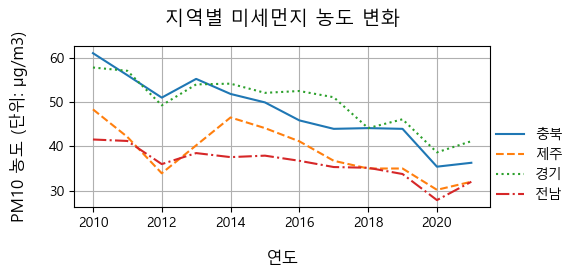

In [30]:
# 그래프 제목
plt.title('지역별 미세먼지 농도 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# 지역별 미먼
plt.plot(data.groupby(['시도명']).get_group('충북')['연도'], data.groupby(['시도명']).get_group('충북')['PM10 농도'], label='충북', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('제주')['연도'], data.groupby(['시도명']).get_group('제주')['PM10 농도'], label='제주', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('경기')['연도'], data.groupby(['시도명']).get_group('경기')['PM10 농도'], label='경기', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['PM10 농도'], label='전남', linestyle='dashdot')

# 그리드 설정
plt.grid(True)

# 레이블 추가
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 범례 표시
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
# plt.legend(loc=(1.0, 0.0), ncol=2) # 범례 두줄로
plt.tight_layout()
# plt.show()
plt.savefig('pm_line.png')

### 1-2. 연도-지역별 미세먼지 추이 지도

In [18]:
import folium
from folium.features import DivIcon
from folium import utilities
from pyppeteer import launch

m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)

import json

state_geo = './TL_SCCO_CTPRVN copy.json'
state_geo

# 시도기준 경계 JSON 파일을 들고 온다.
with open(state_geo, encoding='utf-8') as file:
    sido_map = json.load(file)
    
sido_map
m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)

df = pd.read_csv("complt_data_proc.csv", encoding='cp949')


a = input('테마 : PM2.5 농도 / PM10 농도 / 폐암환자 비율') # 뽑아낼 테마 (PM, 폐암환자수, 비율)
b = int(input('연도 : 2010 ~ 2020 / PM2.5 :2015~2020')) # 연도

#여기서부터 원하는대로 표를 잘라내서 1년 단위로 투입
#PM2.5농도를 지도에 표시하는 에디션
df = df[["시도명", "연도", a]] #뽑아내고 싶은 값에 따라 변경_1 *PM10 PM2.5등
#결손데이터 삭제
df = df_dop_row = df.dropna(axis=0)
#2015년 데이터만 뽑아오기
df = df[df["연도"]==b] #수동으로 값을 변경해줘야 하는 부분_1 #######
print(df)


# if b == 'PM10 농도':
#     color = 'PuRd'
# elif b == 'PM2.5 농도':
#     color = 'BuPu'
# elif b == '폐암환자 비율':
#     color = 'YlOrRd'

#for문을 이용한 자동화<<<실패

ch = folium.Choropleth(
    # geo json 파일로 sido_map 을 사용
    geo_data=sido_map,
    # choropleth 옵션을 쓸 것임
    name='choropleth',
    # data로는 population.csv 파일을 사용 (df로 불러옴)
    data=df,
    # csv 파일에서 사용할 컬럼 값
    columns=['시도명', a ], #뽑아내고 싶은 값에 따라 변경_2
    # 시도명 - CTP_KOR_NM 매핑
    key_on='feature.properties.CTP_KOR_NM',  
    # geo json 색깔 설정
    fill_color='YlOrRd', #데이터마다 다르게? BuPu / YlOrRd
    # 지도 투명하게  
    fill_opacity=0.7,
    # 경계선 투명하게
    line_opacity=1,  
    # 경계선 굵기
    line_weight=1.5,
    # 경계선 색
    line_color='#000',
    # 범례 이름
    legend_name= str(b) + ' 지역별 ' + a# 수동으로 값을 변경해줘야 하는 부분_2 #######
    #  highlight=True, # 하이라이트 설정
).add_to(m)
#https://python-visualization.github.io/folium/modules.html
#folium Parameters
m


# 만든 지도를 png 파일로 캡쳐해서 저장하는 함수
async def map_to_png(target, m):
    html = m.get_root().render()
    browser = await launch(headless=True)

    page = await browser.newPage()
    with utilities.temp_html_filepath(html) as fname:
        await page.goto('file://{path}'.format(path=fname))

    img_data = await page.screenshot({'path': f'output/{target}.png', 'fullPage': 'true', })
    await browser.close()
    
# 함수 test 허리둘레 지도 시각화 
target = str(b) + ' 지역별 ' + a #수동으로 값을 변경해줘야 하는 부분_3 png의 이름 *gif로 맞추기 편하게 1부터...?
await map_to_png(target, m)

ModuleNotFoundError: No module named 'pyppeteer'

### 1-3. 연도-지역별 미세먼지 추이 막대그래프

In [19]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import bar_chart_race as bcr
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
# 전처리 (5) 월평균 자료를 연평균 자료로 변환
# 그루핑


polution_of_air = data.groupby(['연도', '시도명'], as_index=False).mean()
df = polution_of_air
df = df.pivot(index= ["연도"], columns='시도명', values='PM10 농도')#"PM2.5"
df

# pm10 경기 전북 인천 전남 제주 광주
# pm2.5 전북 충남 경기 제주 전남 경남
df = df[["경기", "전북", "인천", "전남", "제주", "광주"]]
bcr.bar_chart_race(df = df, 
                   n_bars = 6,
                   figsize=(3, 4),
                   sort='desc',
                   orientation='v',
                   period_length = 1500,
                   steps_per_period=1,
                   title='시도별 연 평균 PM10 농도')

plt.rcParams['animation.ffmpeg_path'] = 'yourhomepath/anaconda2/envs/yourenv/bin/ffmpeg' 

#df = df[["충남", "전북", "경기", "전남", "제주", "경남"]]
df
# bcr.bar_chart_race(df = df, 
#                    n_bars = 6,
#                    figsize=(3, 4),
#                    sort='desc',
#                    orientation='v',
#                    period_length = 1500,
#                    steps_per_period=1,
#                    title='상/하위 3개 지역 연 평균 PM2.5 농도')

ModuleNotFoundError: No module named 'bar_chart_race'

### 1-4. 연도-지역별 미세먼지 박스플롯 분포 확인

In [20]:
# 연도별 미세먼지 박스플롯

df_pm10_area_cancerrate = data.pivot_table(index = '시도명', columns = '연도', values = 'PM10 농도').sort_index()
df_pm25_area_cancerrate = data.pivot_table(index = '시도명', columns = '연도', values = 'PM2.5 농도').sort_index()

<AxesSubplot:>

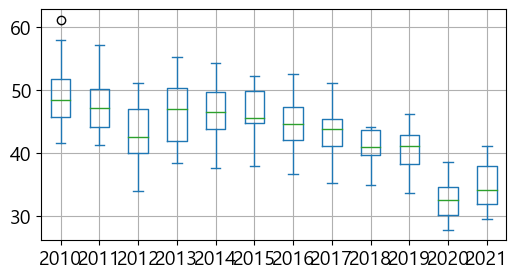

In [21]:
# 미세먼지10

sorted_index = df_pm10_area_cancerrate.mean().sort_index().index
df_pm10_area_cancerrate = df_pm10_area_cancerrate[sorted_index]
df_pm10_area_cancerrate.plot(kind='box', grid  = True)

<AxesSubplot:>

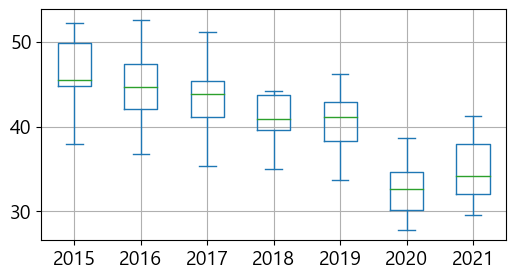

In [22]:
# 미세먼지2.5

sorted_index = df_pm25_area_cancerrate.mean().sort_index().index
df_pm25_area_cancerrate = df_pm10_area_cancerrate[sorted_index]
df_pm25_area_cancerrate.plot(kind='box', grid  = True)


## 2. 암 환자 데이터 시각화

### 2-1. 연도-지역별 폐암환자 비율(/총인구) 추이 선그래프  

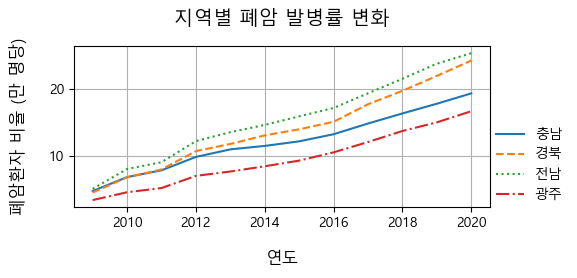

In [29]:
# 그래프 제목
plt.title('지역별 폐암 발병률 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# 지역별 미먼
plt.plot(data.groupby(['시도명']).get_group('충남')['연도'], data.groupby(['시도명']).get_group('충남')['폐암환자 비율']*10000, label='충남', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('경북')['연도'], data.groupby(['시도명']).get_group('경북')['폐암환자 비율']*10000, label='경북', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['폐암환자 비율']*10000, label='전남', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('광주')['연도'], data.groupby(['시도명']).get_group('광주')['폐암환자 비율']*10000, label='광주', linestyle='dashdot')

# 그리드 설정
plt.grid(True)

# 레이블 추가
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율 (만 명당)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 범례 표시
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
plt.tight_layout()
# plt.show()
plt.savefig('cancer_line.png')

### 2-2. 연도-지역별 폐암환자 비율(/총인구) 추이 지도 

In [24]:
pip install ffmpeg

Note: you may need to restart the kernel to use updated packages.


In [25]:
## import folium
from folium.features import DivIcon
from folium import utilities
from pyppeteer import launch

m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)

import json

state_geo = './TL_SCCO_CTPRVN copy.json'
state_geo

# 시도기준 경계 JSON 파일을 들고 온다.
with open(state_geo, encoding='utf-8') as file:
    sido_map = json.load(file)
    
sido_map
m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)

df = pd.read_csv("complt_data_proc.csv", encoding='cp949')


a = '폐암환자 비율' # 뽑아낼 테마 (PM, 폐암환자수, 비율)
b = int(input('연도 : 2010 ~ 2020 / PM2.5 :2015~2020')) # 연도

#여기서부터 원하는대로 표를 잘라내서 1년 단위로 투입
#PM2.5농도를 지도에 표시하는 에디션
df = df[["시도명", "연도", a]] #뽑아내고 싶은 값에 따라 변경_1 *PM10 PM2.5등
#결손데이터 삭제
df = df_dop_row = df.dropna(axis=0)
#2015년 데이터만 뽑아오기
df = df[df["연도"]==b] #수동으로 값을 변경해줘야 하는 부분_1 #######
print(df)

color =''

if b == 'PM10 농도':
    color = 'PuRd'
elif b == 'PM2.5 농도':
    color = 'BuPu'
elif b == '폐암환자 비율':
    color = 'YlOrRd'

#for문을 이용한 자동화<<<실패

ch = folium.Choropleth(
    # geo json 파일로 sido_map 을 사용
    geo_data=sido_map,
    # choropleth 옵션을 쓸 것임
    name='choropleth',
    # data로는 population.csv 파일을 사용 (df로 불러옴)
    data=df,
    # csv 파일에서 사용할 컬럼 값
    columns=['시도명', a ], #뽑아내고 싶은 값에 따라 변경_2
    # 시도명 - CTP_KOR_NM 매핑
    key_on='feature.properties.CTP_KOR_NM',  
    # geo json 색깔 설정
    fill_color=color, #데이터마다 다르게? BuPu / YlOrRd
    # 지도 투명하게  
    fill_opacity=0.7,
    # 경계선 투명하게
    line_opacity=1,  
    # 경계선 굵기
    line_weight=1.5,
    # 경계선 색
    line_color='#000',
    # 범례 이름
    legend_name= str(b) + ' 지역별 ' + a# 수동으로 값을 변경해줘야 하는 부분_2 #######
    #  highlight=True, # 하이라이트 설정
).add_to(m)
#https://python-visualization.github.io/folium/modules.html
#folium Parameters
m


# 만든 지도를 png 파일로 캡쳐해서 저장하는 함수
# async def map_to_png(target, m):
#     html = m.get_root().render()
#     browser = await launch(headless=True)

#     page = await browser.newPage()
#     with utilities.temp_html_filepath(html) as fname:
#         await page.goto('file://{path}'.format(path=fname))

#     img_data = await page.screenshot({'path': f'output/{target}.png', 'fullPage': 'true', })
#     await browser.close()
    
# # 함수 test 허리둘레 지도 시각화 
# target = str(b) + ' 지역별 ' + a #수동으로 값을 변경해줘야 하는 부분_3 png의 이름 *gif로 맞추기 편하게 1부터...?
# await map_to_png(target, m)

ModuleNotFoundError: No module named 'pyppeteer'

### 2.3 연도-지역별 폐암환자 비율(/총인구) 추이 막대그래프  

In [ ]:
# import pandas as pd
# #import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc
# import bar_chart_race as bcr
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
# # 전처리 (5) 월평균 자료를 연평균 자료로 변환
# # 그루핑


# polution_of_air = data.groupby(['연도', '시도명'], as_index=False).mean()
# df = polution_of_air
# df = df.pivot(index= ["연도"], columns='시도명', values='PM10 농도')#"PM2.5"
# # # df

# # pm10 경기 전북 인천 전남 제주 광주
# # pm2.5 전북 충남 경기 제주 전남 경남
# df = df[["경기", "전북", "인천", "전남", "제주", "광주"]]
# bcr.bar_chart_race(df = df, 
#                    n_bars = 6,
#                    figsize=(3, 4),
#                    sort='desc',
#                    orientation='v',
#                    period_length = 1500,
#                    steps_per_period=1,
#                    title='시도별 연 평균 PM10 농도')

# #df = df[["충남", "전북", "경기", "전남", "제주", "경남"]]
# # df
# # bcr.bar_chart_race(df = df, 
# #                    n_bars = 6,
# #                    figsize=(3, 4),
# #                    sort='desc',
# #                    orientation='v',
# #                    period_length = 1500,
# #                    steps_per_period=1,
# #                    title='상/하위 3개 지역 연 평균 PM2.5 농도')

### 2-4.연도-지역별 폐암환자 비율(/총인구) 박스플롯 분포 확인

In [ ]:
# 년도별 폐암환자 비율 boxplot

data1 = data.copy()
data1['폐암환자 비율'] = [i*10000 for i in data1['폐암환자 비율'].tolist()]

df_cancer_year_cancerrate = data1.pivot_table(index = '시도명', columns = '연도', values = '폐암환자 비율')
# moon

In [ ]:
sorted_index = df_cancer_year_cancerrate.mean().sort_values().index
df_cancer_year_cancerrate = df_cancer_year_cancerrate[sorted_index]
df_cancer_year_cancerrate.plot(kind='box', grid  = True)
df_cancer_year_cancerrate.mean()
# moon

In [ ]:
df_cancer_year_cancerrate = data1.pivot_table(index = '연도', columns = '시도명', values = '폐암환자 비율')

sorted_index = df_cancer_year_cancerrate.mean().sort_values().index
df_cancer_year_cancerrate = df_cancer_year_cancerrate[sorted_index]
df_cancer_year_cancerrate.plot(kind='box', grid  = True)
df_cancer_year_cancerrate.mean()
# moon

## 3. 미세먼지와 폐암환자 상관성 시각화

### 3-1. 연도별 미세먼지 - 폐암 추이 선그래프  

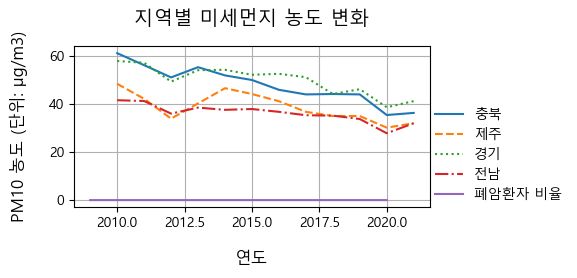

In [31]:
# y축 하나만 했을 때 폐암환자 비율은 보이지도 않음

plt.title('지역별 미세먼지 농도 변화', fontsize=14, pad=15)
plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(data.groupby(['시도명']).get_group('충북')['연도'], data.groupby(['시도명']).get_group('충북')['PM10 농도'], label='충북', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('제주')['연도'], data.groupby(['시도명']).get_group('제주')['PM10 농도'], label='제주', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('경기')['연도'], data.groupby(['시도명']).get_group('경기')['PM10 농도'], label='경기', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['PM10 농도'], label='전남', linestyle='dashdot')
# y축 하나만 했을 때 폐암환자 비율은 보이지도 않음
plt.plot(data.groupby(['시도명']).get_group('서울')['연도'], data.groupby(['시도명']).get_group('서울')['폐암환자 비율'], label='폐암환자 비율')
plt.grid(True)
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
plt.tight_layout()
# plt.show()
plt.savefig('pm10_cancer_1.png')

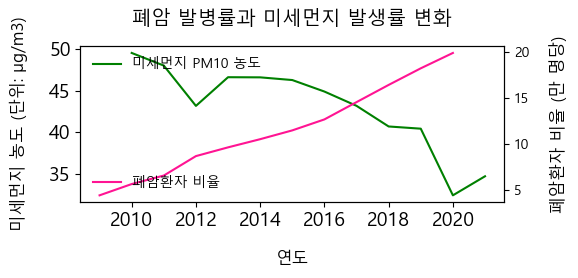

In [32]:
# 이중 축

# 한 그래프에 여러개 그릴거야
fig, ax1 = plt.subplots()

# 그래프 제목
plt.title('폐암 발병률과 미세먼지 발생률 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# x 연도별 y 미세먼지 농도 그래프 먼저 그리고
ax1.plot(data['연도'].unique(), data.groupby(['연도'])['PM10 농도'].mean(), label='미세먼지 PM10 농도', color='green')
ax1.set_xlabel('연도', fontsize=12, labelpad=15)
ax1.set_ylabel('미세먼지 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
ax1.legend(loc='upper left', fontsize=10, frameon=False)

# ax1과 x축을 공유하는 새로운 Axes 객체 생성
ax2 = ax1.twinx()

# y폐암환자 비율 그래프 추가
ax2.plot(data['연도'].unique(), data.groupby(['연도'])['폐암환자 비율'].mean()*10000, label='폐암환자 비율', color='deeppink')
ax2.set_ylabel('폐암환자 비율 (만 명당)', fontsize=12, labelpad=15)
ax2.legend(loc='lower left', fontsize=10, frameon=False)


# 숫자크기 조정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.show()
plt.savefig('pm10_cancer_2.png')

### 3-2. 연도별 미세먼지 - 폐암 산점도 

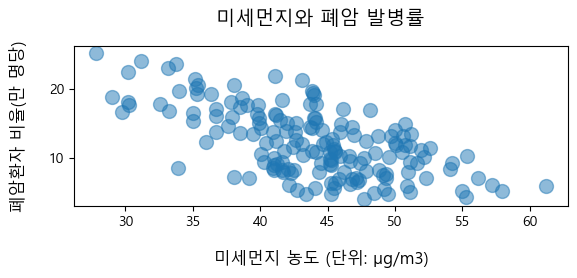

In [33]:
# 색깔 바꾸고 싶어!!!!!!!!!!!!!!

# 그래프 제목
plt.title('미세먼지와 폐암 발병률', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

plt.scatter(data['PM10 농도'], data['폐암환자 비율']*10000, s=100, alpha=0.5)

# 레이블
plt.xlabel('미세먼지 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율(만 명당)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.show()
plt.savefig('pm10_cancer_scatter.png')

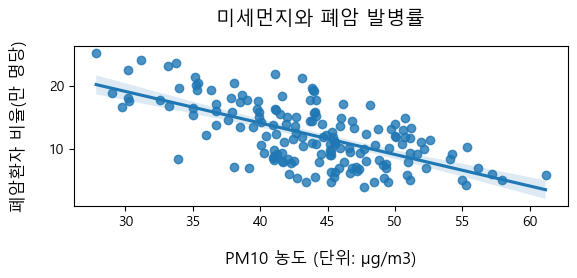

In [34]:
plt.title('미세먼지와 폐암 발병률', fontsize=14, pad=15)

a = sns.regplot(x = data['PM10 농도'], y = data['폐암환자 비율']*10000, data = data)

plt.xlabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율(만 명당)', fontsize=12, labelpad=15)

# 숫자크기
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.show()
plt.savefig('pm10_cancer_regplot.png')